In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train=pd.read_csv('Google_Stock_price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set=dataset_train.iloc[:,1:2].values # converting Open column to numpy array


In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc=MinMaxScaler()

In [8]:
training_set_scaled=sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
training_set_scaled.shape

(1258, 1)

# Create a data structure with 60 timesteps and 1 output

In [11]:
# 60 timesteps means that each time T, the RNN is going to look at the 60 stock prices before time T, 
#that is the stock prices between 60 days before time T 
#and time T, and based on the trends, it is capturing during these 60,previous timesteps, it will predict the next output
# that is the stock price at T+1

In [12]:
x_train=[] # input
y_train=[] # output

In [13]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [14]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
x_train.shape

(1198, 60)

# Reshaping

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #(batch size,time steps, indicators)

# Building and Training RNN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [18]:
regressor = Sequential()

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units = 1)) # output layer

# compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN

In [25]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32) # 100 epochs


Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0438
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0053
Epoch 11/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [===========================

# Real stock price of google,2017

In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Get the predicted stock price

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

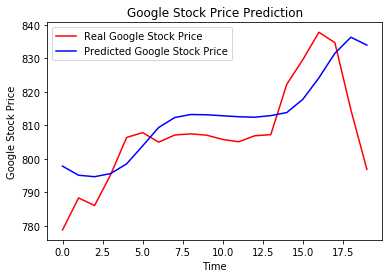

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()